In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/76/e8/260752c1bc8dc856b27cfefaa3fca29ba02a15f649bbf6e9c15ed54e5480/xgboost-2.0.2-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from matplotlib import cm
import datetime

In [11]:
##Exploratory Data Analysis

In [12]:
#import data
df1 = pd.read_csv('USvideos.csv')

In [13]:
#understanding data, it shows there are 16 variables and there are 40949 observations, 
#and noticed there are some data missing in the 'description'
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [14]:
#fill in the missing values in 'description' with null
df1['description'] = df1['description'].fillna('NULL')

In [15]:
# look at the first five rows and observe a handful of columns provide ancillary info
df1.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [16]:
# drop videos with same video_id, since it's a duplicate
df1.drop_duplicates()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NULL
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [18]:
#calculate the mean of views, likes, dislikes, and comment_count
df1[['views', 'likes', 'dislikes', 'comment_count']].agg('mean')

views            2.360785e+06
likes            7.426670e+04
dislikes         3.711401e+03
comment_count    8.446804e+03
dtype: float64

In [19]:
df1.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [20]:
# data cleaning
df1['tags'] = df1['tags'].apply(lambda x: x.replace('|',' ').replace('"',""))

In [21]:
#import json file and find corresponding categories
df_category= pd.read_json('US_category_id.json')
df_category.head
df_category = pd.json_normalize(df_category['items'])

In [22]:
#obtain category names corresponds to category ids
df_category['id'] = pd.to_numeric(df_category['id'])
df1=df1.merge(df_category,how='inner', left_on='category_id', right_on='id')
df1

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,cute cats thai eggs,98966,2486,184,...,False,False,False,Kittens come out of the eggs in a Thai commerc...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,shawn johnson andrew east shawn east shawn and...,321053,4451,1772,...,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,217,...,False,False,False,Molly is an god damn amazing human and she cha...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week ...,2744430,115426,1110,...,False,False,False,I found this online dollar store called ShopMi...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,608,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,610,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,615,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,615,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False


In [23]:
df_renamed = df1.rename(columns={'snippet.title': 'category'})
df_renamed

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,kind,etag,id,snippet.channelId,category,snippet.assignable
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,cute cats thai eggs,98966,2486,184,...,False,False,False,Kittens come out of the eggs in a Thai commerc...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,shawn johnson andrew east shawn east shawn and...,321053,4451,1772,...,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,217,...,False,False,False,Molly is an god damn amazing human and she cha...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week ...,2744430,115426,1110,...,False,False,False,I found this online dollar store called ShopMi...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,608,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,610,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,615,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,615,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False


In [24]:
df = df_renamed.drop(columns= ['kind', 'etag', 'snippet.channelId', 'snippet.assignable'], axis = 1)
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,cute cats thai eggs,98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,22,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,shawn johnson andrew east shawn east shawn and...,321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,22,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week ...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,22,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,608,1644,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,610,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,615,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,615,1649,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows


In [25]:
#select the numeric column
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['category_id' 'views' 'likes' 'dislikes' 'comment_count' 'id']


In [26]:
#Fix data format for numeric column
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    df[column] = df[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    df[column] = df[column].astype(str)

In [27]:
#select the non-numeric column
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['video_id' 'trending_date' 'title' 'channel_title' 'category_id'
 'publish_time' 'tags' 'thumbnail_link' 'comments_disabled'
 'ratings_disabled' 'video_error_or_removed' 'description' 'category']


In [28]:
#format date
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [29]:
#format time
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_time'].head()

0   2017-11-13 17:13:01
1   2017-04-21 06:47:32
2   2017-11-11 15:00:03
3   2017-11-11 18:08:04
4   2017-11-11 01:19:33
Name: publish_time, dtype: datetime64[ns]

In [30]:
#divide the date and time in seperate column
df.insert(4, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df[['publish_date', 'publish_time']].head()

,publish_date,publish_time
0,2017-11-13,17:13:01
1,2017-04-21,06:47:32
2,2017-11-11,15:00:03
3,2017-11-11,18:08:04
4,2017-11-11,01:19:33


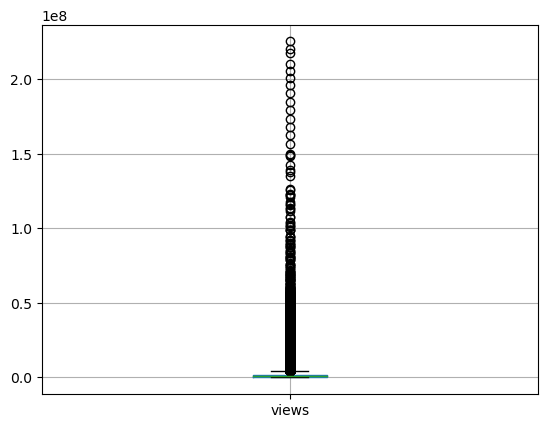

In [31]:
#find outlier
df.boxplot(column=['views'])
plt.show()
#no outlier shown

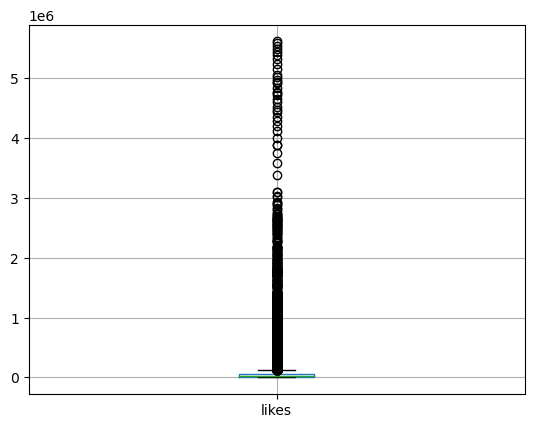

In [32]:
df.boxplot(column=['likes'])
plt.show()

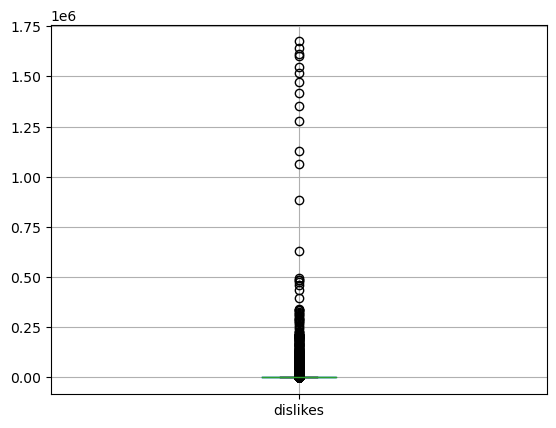

In [33]:
df.boxplot(column=['dislikes'])
plt.show()

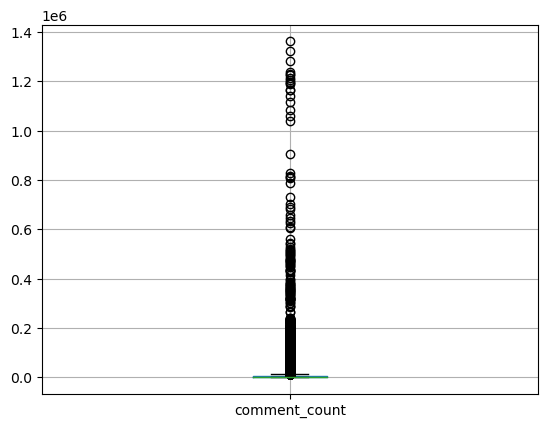

In [34]:
df.boxplot(column=['comment_count'])
plt.show()

In [35]:
#No obvious outlier in the numerical column

In [36]:
#we want to see if there's outlier in categorical column
df['category_id'].describe()
#no outlier shown

count     40949
unique       16
top          24
freq       9964
Name: category_id, dtype: object

In [37]:
#check for duplicates
df.isna().sum()
#no duplicates shown

video_id                  0
trending_date             0
title                     0
channel_title             0
publish_date              0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
id                        0
category                  0
dtype: int64

In [38]:
## Data Analysis: Visualization

In [39]:
#Visualizing numerical data using heatmap
#obtain matrix only contains numerical columns
numeric = ['views', 'likes', 'dislikes', 'comment_count']
matrix_numeric = df[numeric].corr()
matrix_numeric

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/2659667256.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, minor=False)
/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/2659667256.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, minor=False)


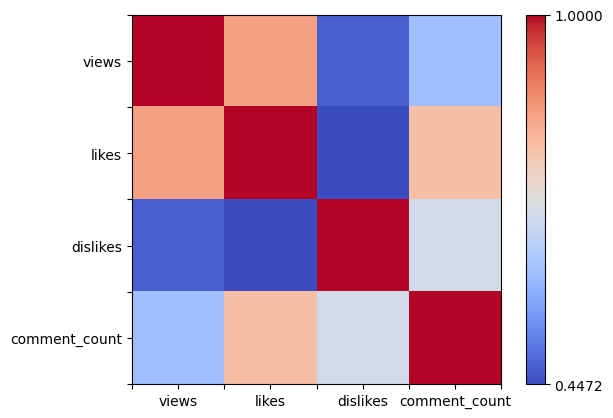

In [40]:
#plot in heat map
fig, ax = plt.subplots()
heatmap = ax.imshow(matrix_numeric, interpolation='nearest', cmap=cm.coolwarm)

# making the colorbar on the side
cbar_min = matrix_numeric.min().min()
cbar_max = matrix_numeric.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in numeric:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show()

#from the heatmap, we noticed that views is strongly correlated with likes, dislikes, and comment_count

/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/2102889240.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["views"], kde=False, hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47))


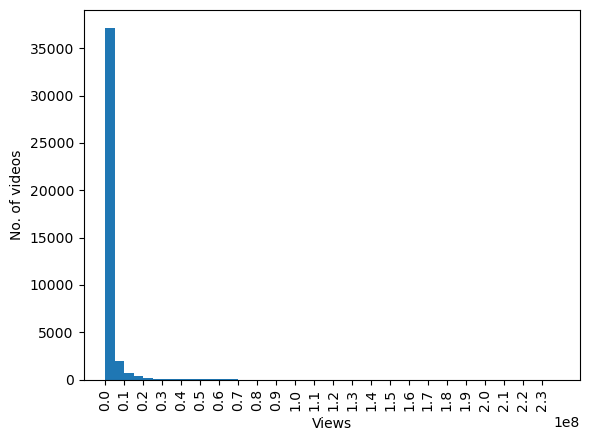

In [41]:
#construct histogram for 'views' and take a look at the distribution
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47))
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)
plt.show()

/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/1107766891.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df[df["views"]<=5e7]["likes"], kde = False, hist_kws={'alpha':1})


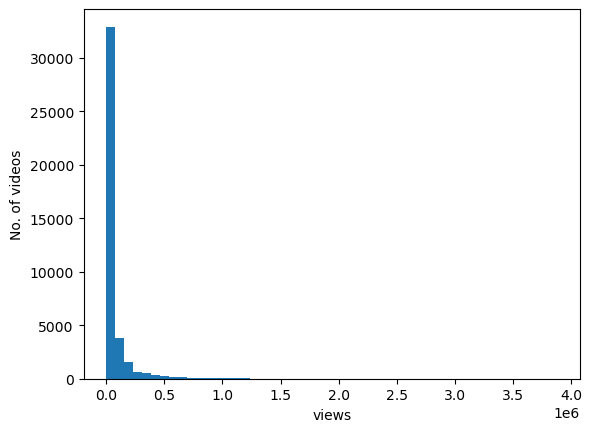

In [42]:
#we noticed that most trending videos have views between 0 and 100000000. Let's look closer at the data within that range
fig, ax = plt.subplots()
_=sns.distplot(df[df["views"]<=5e7]["likes"], kde = False, hist_kws={'alpha':1})
_=ax.set(xlabel = "views", ylabel = "No. of videos")
plt.show()

In [43]:
#take a look at the proportion of the videos which have views between 1 to 100000000
df[df['views'] < 1e8]['views'].count() / df['views'].count() * 100

99.90231751691128

In [44]:
#take a look at the proportion of the videos which have views between 1 to 10000000
df[df['views'] < 1e7]['views'].count() / df['views'].count() * 100

95.48706928130113

In [45]:
#we conclude that 95% of the trending videos have views between 0 to 10000000

/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/3279190821.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["likes"], kde=False,


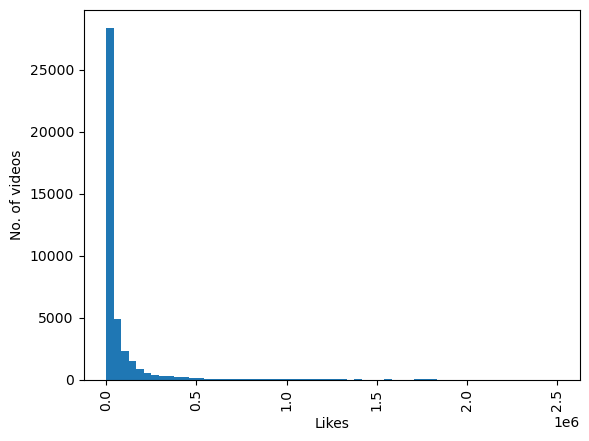

In [46]:
#construct histogram for 'likes' and take a look at the distribution
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2.5e6, 61))
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)
plt.show()

/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/1011097673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df[df["likes"]<=1e6]["likes"], kde = False, hist_kws={'alpha':1})


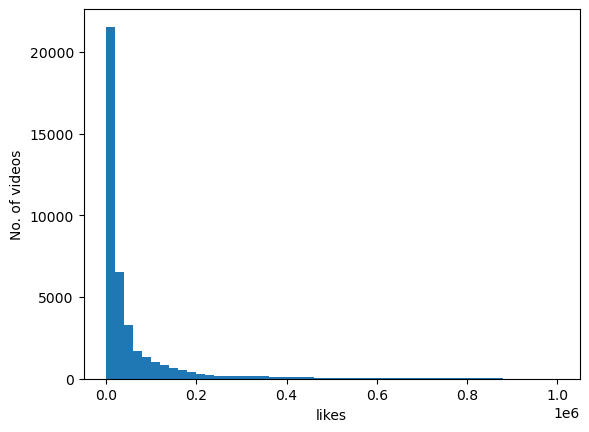

In [47]:
#we noticed that most trending videos have likes between 0 and 1000000. Let's look closer at the data within that range
fig, ax = plt.subplots()
_=sns.distplot(df[df["likes"]<=1e6]["likes"], kde = False, hist_kws={'alpha':1})
_=ax.set(xlabel = "likes", ylabel = "No. of videos")
plt.show()

In [48]:
#from above, we noticed that most trending videos have likes between 0 to 400000 likes, so we want to see some proportions here
df[df['likes'] < 4e5]['likes'].count() / df['likes'].count() * 100

96.58111309189479

In [49]:
#also take a look at the total proportion of the videos within 1000000 likes
df[df['likes'] < 1e6]['likes'].count() / df['likes'].count() * 100

99.09887909350655

In [50]:
#we conclude that the majority of trending videos have likes within 1000000 likes

/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/625666929.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["comment_count"], kde=False,


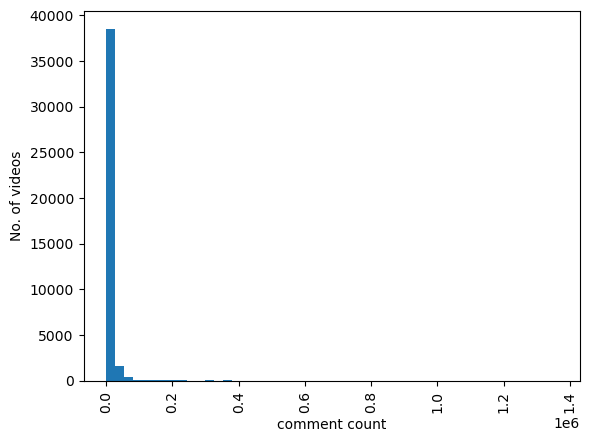

In [51]:
#construct histogram for 'comment_count' and take a look at the distribution
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, 
                 hist_kws={'alpha': 1})
_ = ax.set(xlabel="comment count", ylabel="No. of videos")
_ = plt.xticks(rotation=90)
plt.show()

In [52]:
#we noticed that most trending videos have likes between 0 and 200000. Let's look closer at the data within that range

/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/3814745854.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df[df["comment_count"]<=200000]["comment_count"], kde = False, hist_kws={'alpha':1})


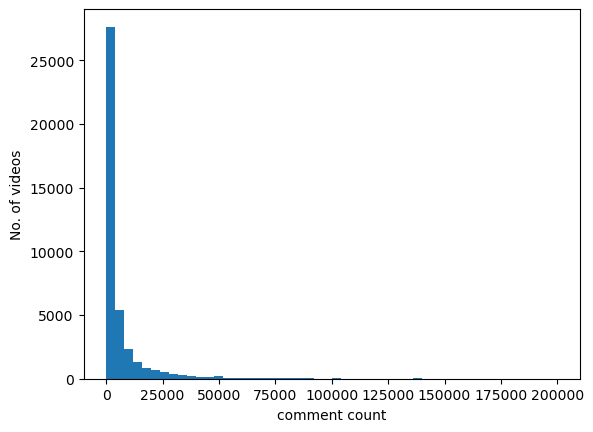

In [53]:
fig, ax = plt.subplots()
_=sns.distplot(df[df["comment_count"]<=200000]["comment_count"], kde = False, hist_kws={'alpha':1})
_=ax.set(xlabel = "comment count", ylabel = "No. of videos")
plt.show()

In [54]:
#from the graph, we see that most trending videos have comment count between 0 to 37500, let take a look at the proportion
df[df['comment_count'] < 37500]['comment_count'].count() / df['comment_count'].count() 

0.96202593469926

/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/2589394245.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df[df["comment_count"]==0]["views"], kde=False, hist_kws={'alpha': 1}, bins=np.linspace(0, 2e8, 47))


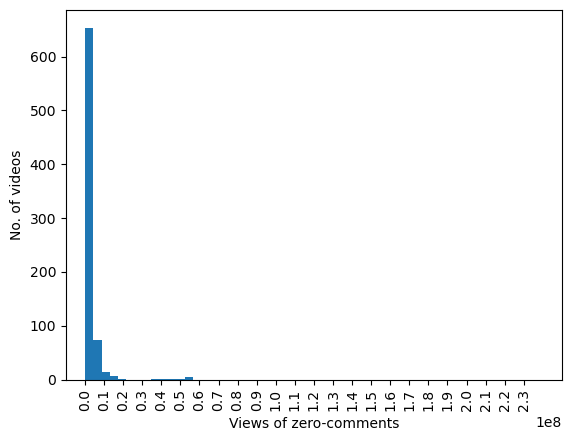

In [55]:
#another thing we want to look at is that for the videos with 0 comment as well as comment disabled
#we want to analyze their views
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"]==0]["views"], kde=False, hist_kws={'alpha': 1}, bins=np.linspace(0, 2e8, 47))
_ = ax.set(xlabel="Views of zero-comments", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)
plt.show()

/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/3430875098.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df[df["comment_count"]==0]["views"], kde = False, hist_kws={'alpha':1}, ax = ax)


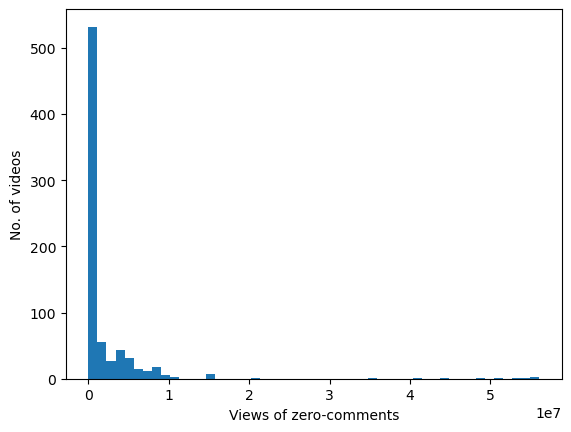

In [56]:
#we noticed that most trending videos have 0 comment between 0 and 1000000. Let's look closer at the data within that range
fig, ax = plt.subplots()
_=sns.distplot(df[df["comment_count"]==0]["views"], kde = False, hist_kws={'alpha':1}, ax = ax)
_=ax.set(xlabel = "Views of zero-comments", ylabel = "No. of videos")
plt.show()

In [57]:
#with the above graph, we noticed that there is a large portion of videos with zero comments have very few views.
#while we want to look into those videos which still have large number of views with comments disabled. 
df["comments_disabled"].value_counts(normalize=True)
#we can see that around 1.5% of the videos have comment disabled, which indicates that comment-disabled may not have significant effects in our analysis

comments_disabled
False    0.984542
True     0.015458
Name: proportion, dtype: float64

In [58]:
#let's find out how many videos have their rating disabled
df["ratings_disabled"].value_counts(normalize=True)
#we can see that only 0.4% of the videos have rating disabled, which indicates that rating-disabled may not have significant effects in our analysis

ratings_disabled
False    0.995873
True     0.004127
Name: proportion, dtype: float64

In [59]:
#However, we want to look at the videos with both comment and rating disabled while still have large number of views 
df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].describe()
#from the information provided below, we can conclude that the videos with both comment and rating disabled have 0 likes and dislikes
#while still have views up to around 56000000, this suggest that such videos may not be very representative
#with the total count of such videos is 106, around 0.2% of the total videos, it will have tiny effects to our analysis

,trending_date,views,likes,dislikes,comment_count,id
count,106,1.060000e+02,106.0,106.0,106.0,106.000000
mean,2018-01-31 08:36:13.584905728,6.002661e+06,0.0,0.0,0.0,20.264151
min,2017-11-21 00:00:00,1.456000e+03,0.0,0.0,0.0,1.000000
25%,2017-12-08 06:00:00,8.889950e+04,0.0,0.0,0.0,17.000000
50%,2018-02-07 12:00:00,8.562450e+05,0.0,0.0,0.0,22.000000
75%,2018-03-08 18:00:00,1.049482e+06,0.0,0.0,0.0,26.000000
max,2018-04-06 00:00:00,5.611196e+07,0.0,0.0,0.0,29.000000
std,NaN,1.391286e+07,0.0,0.0,0.0,8.182795


In [60]:
#Before looking at correlation between numerical column, we want to first see the distribution of 
#category related to the number of trending videos and see if it's balanced distributed 

In [61]:
#look at number of trending videos of different category
df['category'].value_counts()

category
Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: count, dtype: int64

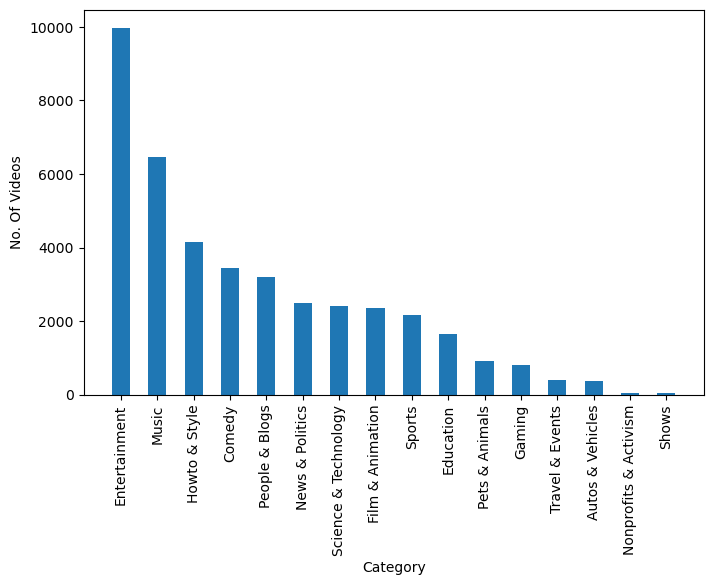

In [62]:
my_dict = (df['category'].value_counts()).to_dict()
count = pd.DataFrame(list(my_dict.items()),
                     columns = ['Category','No. Of Videos']) 
fig = plt.figure(figsize = (8,5))
plt.bar(count['Category'],count['No. Of Videos'], width=0.5)
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("No. Of Videos")
plt.show()

In [63]:
#from the above graph, we can see the Entertainment has the largest number of trending videos 
#at approximately 10000. Music and Howto & style are followed. 

In [64]:
#create a new data frame containing only Entertainment category
df_e = df[df.category == 'Entertainment']
df_e

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category
3210,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,last week tonight trump presidency last week t...,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",24,Entertainment
3211,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,24,11:00:04,rhett and link gmm good mythical morning rhett...,343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,24,Entertainment
3212,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,ryan higa higatv nigahiga i dare you idy rhpc ...,2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,Entertainment
3213,39idVpFF7NQ,2017-11-14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,2017-11-12,24,05:37:17,SNL Saturday Night Live SNL Season 43 Episode ...,2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,24,Entertainment
3214,VifQlJit6A0,2017-11-14,(SPOILERS) 'Shiva Saves the Day' Talked About ...,amc,2017-11-13,24,03:00:00,The Walking Dead shiva tiger king ezekiel epis...,104578,1576,303,1279,https://i.ytimg.com/vi/VifQlJit6A0/default.jpg,False,False,False,Shiva arrives just in time as King Ezekiel att...,24,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13169,wI89nVn6LHk,2018-06-14,Maddie Poppe Wins American Idol 2018 - Finale ...,American Idol,2018-05-22,24,04:08:24,ABC americanidol idol american idol ryan seacr...,2003345,19895,2831,3481,https://i.ytimg.com/vi/wI89nVn6LHk/default.jpg,False,False,False,Maddie Poppe the crowd the American Idol 2018 ...,24,Entertainment
13170,tiF9SzzzX_o,2018-06-14,The Voice 2018 Brynn Cartelli - Finale: Skyfall,The Voice,2018-05-22,24,02:34:39,the voice season 14 the voice finale performan...,1437051,19930,1794,1671,https://i.ytimg.com/vi/tiF9SzzzX_o/default.jpg,False,False,False,Brynn Cartelli sings Adele's Skyfall during th...,24,Entertainment
13171,Qcj15vHJTtk,2018-06-14,Royal Wedding - SNL,Saturday Night Live,2018-05-20,24,04:58:51,SNL Saturday Night Live SNL Season 43 SNL Epis...,8607264,66559,14179,8382,https://i.ytimg.com/vi/Qcj15vHJTtk/default.jpg,False,False,False,Footage from Prince Harry's (Mikey Day) weddin...,24,Entertainment
13172,_QWZvU7VCn8,2018-06-14,Brad Pitt Bid $120k For A Night With Emilia Cl...,The Graham Norton Show,2018-05-18,24,17:13:08,Graham Norton Graham Norton Show Official Ente...,5564576,46351,2295,2861,https://i.ytimg.com/vi/_QWZvU7VCn8/default.jpg,False,False,False,Check out all that Emilia Clarke merch... Subs...,24,Entertainment


In [65]:
#After analysis of each numerical column and visualization of category distribution, 
#we want to see some correlations between views and likes in the selected category

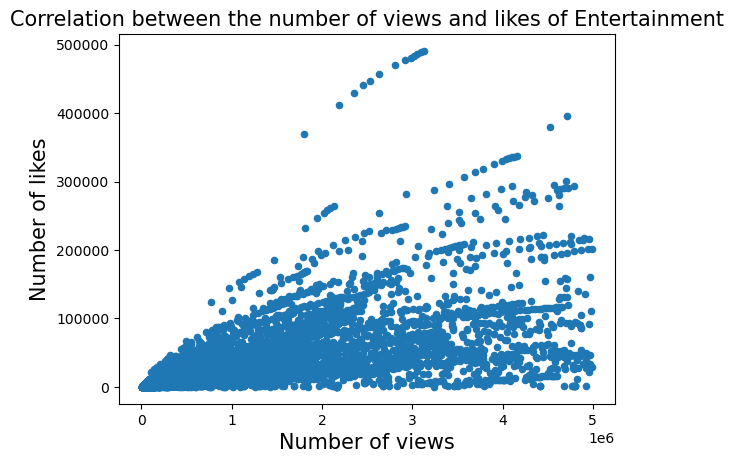

In [66]:
#1. correlation between views and likes of category Entertainment
fig = df_e[df_e['views'] < 5000000].plot.scatter(x = "views", y = "likes")
plt.title('Correlation between the number of views and likes of Entertainment', fontsize = 15)
plt.xlabel('Number of views', fontsize = 15)
plt.ylabel('Number of likes', fontsize = 15)
plt.show()
#The plot shows better scatter with dots more spread.

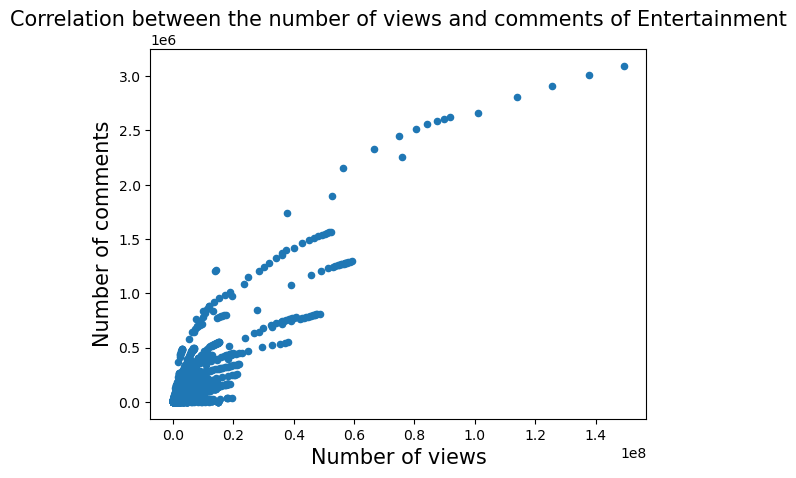

In [67]:
#2. correlation between views and comments of category Entertainment
fig = df_e[df_e['comment_count'] < 5000000].plot.scatter(x = "views", y = "likes")
plt.title('Correlation between the number of views and comments of Entertainment', fontsize = 15)
plt.xlabel('Number of views', fontsize = 15)
plt.ylabel('Number of comments', fontsize = 15)
plt.show()

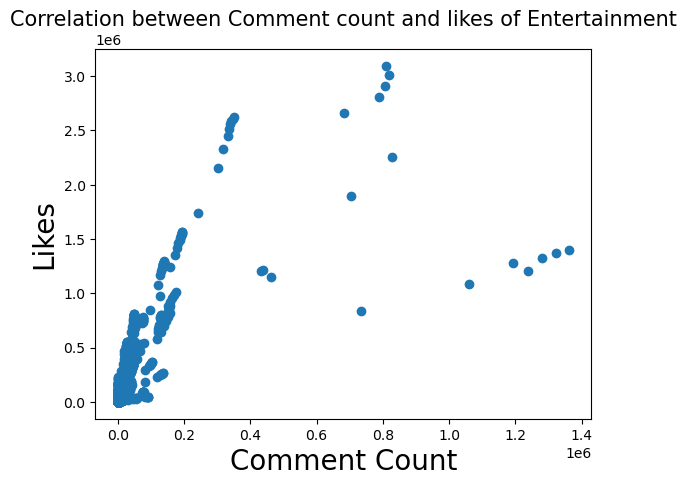

In [68]:
#3. correlation between likes and comments of category Entertainment
fig, ax = plt.subplots()
ax.scatter(df_e['comment_count'], df_e['likes'])
plt.title('Correlation between Comment count and likes of Entertainment', fontsize = 15)
plt.xlabel("Comment Count", size=20)
plt.ylabel("Likes", size=20)
plt.show()

In [69]:
#From above, we noticed there are some linear relationships between:
#the number of views and the number of likes,
#the number of views and the number of comments
#the number of comment counts and the number of likes

In [70]:
#Next, let's look at trending date and see how publish data and pulish time affect the video trend

In [71]:
#first, let's crate a new column indicating what is the day that the video is published
#add a column of what day the video is uploaded
df['publishing_day'] =  pd.to_datetime(df['publish_date']).apply(lambda x: x.strftime('%A'))
df['publishing_day']

0          Monday
1          Friday
2        Saturday
3        Saturday
4        Saturday
           ...   
40944    Thursday
40945    Thursday
40946    Thursday
40947    Thursday
40948    Thursday
Name: publishing_day, Length: 40949, dtype: object

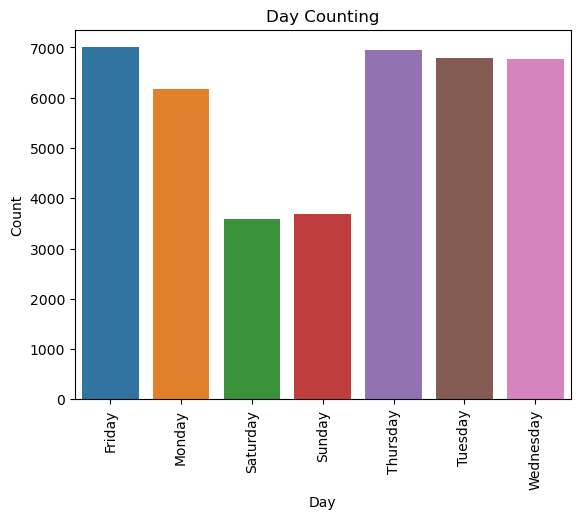

In [72]:
#plot number of videos published corresponding to different day
plt.subplot()
g = sns.countplot( x = 'publishing_day', data=df, order = sorted(df['publishing_day'].unique()))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Day Counting")
g.set_xlabel("Day")
g.set_ylabel("Count")
plt.show()
#we noticed that on Friday, Thursday, Tuesday and Wednesday, the number of trending videos are relatively larger than the other days

In [73]:
#second, let's see what hour the video is published
df[['hour','min','sec']] = df['publish_time'].astype(str).str.split(':', expand=True)
df

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category,publishing_day,hour,min,sec
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs,Monday,17,13,01
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21,22,06:47:32,cute cats thai eggs,98966,2486,...,False,False,False,Kittens come out of the eggs in a Thai commerc...,22,People & Blogs,Friday,06,47,32
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11,22,15:00:03,shawn johnson andrew east shawn east shawn and...,321053,4451,...,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs,Saturday,15,00,03
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11,22,18:08:04,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,...,False,False,False,Molly is an god damn amazing human and she cha...,22,People & Blogs,Saturday,18,08,04
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11,22,01:19:33,wearing online dollar store makeup for a week ...,2744430,115426,...,False,False,False,I found this online dollar store called ShopMi...,22,People & Blogs,Saturday,01,19,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,2018-06-02,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40945,V6ElE2xs48c,2018-06-03,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40946,V6ElE2xs48c,2018-06-04,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40947,V6ElE2xs48c,2018-06-05,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22


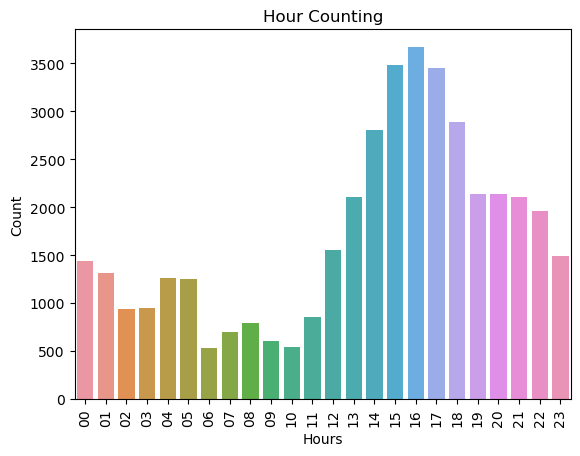

In [74]:
#plot in number of videos published corresponding to hours
plt.subplot()
g = sns.countplot( x = 'hour', data=df, order = sorted(df['hour'].unique()))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Hour Counting")
g.set_xlabel("Hours")
g.set_ylabel("Count")
plt.show()
#from the plot, we noticed that there are more trending videos published within time interval between 3pm to 6pm

In [75]:
#check the dataset after adding day&ho
df

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category,publishing_day,hour,min,sec
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs,Monday,17,13,01
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21,22,06:47:32,cute cats thai eggs,98966,2486,...,False,False,False,Kittens come out of the eggs in a Thai commerc...,22,People & Blogs,Friday,06,47,32
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11,22,15:00:03,shawn johnson andrew east shawn east shawn and...,321053,4451,...,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs,Saturday,15,00,03
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11,22,18:08:04,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,...,False,False,False,Molly is an god damn amazing human and she cha...,22,People & Blogs,Saturday,18,08,04
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11,22,01:19:33,wearing online dollar store makeup for a week ...,2744430,115426,...,False,False,False,I found this online dollar store called ShopMi...,22,People & Blogs,Saturday,01,19,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,2018-06-02,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40945,V6ElE2xs48c,2018-06-03,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40946,V6ElE2xs48c,2018-06-04,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40947,V6ElE2xs48c,2018-06-05,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22


In [76]:
##Modeling

In [77]:
#Before modeling, we want to choose categories that are only related to travel
category = df['category'].unique()
category
#From below, we choose Entertainment, Sports, Autos & Vehicles, Travel & Events
categories_to_keep = ['Entertainment', 'Sports', 'Autos & Vehicles', 'Travel & Events']
condition = df['category'].isin(categories_to_keep)
df = df[condition]
df

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category,publishing_day,hour,min,sec
3210,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,last week tonight trump presidency last week t...,2418783,97185,...,False,False,False,"One year after the presidential election, John...",24,Entertainment,Monday,07,30,00
3211,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,24,11:00:04,rhett and link gmm good mythical morning rhett...,343168,10172,...,False,False,False,Today we find out if Link is a Nickelback amat...,24,Entertainment,Monday,11,00,04
3212,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,ryan higa higatv nigahiga i dare you idy rhpc ...,2095731,132235,...,False,False,False,I know it's been a while since we did this sho...,24,Entertainment,Sunday,18,01,41
3213,39idVpFF7NQ,2017-11-14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,2017-11-12,24,05:37:17,SNL Saturday Night Live SNL Season 43 Episode ...,2103417,15993,...,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,24,Entertainment,Sunday,05,37,17
3214,VifQlJit6A0,2017-11-14,(SPOILERS) 'Shiva Saves the Day' Talked About ...,amc,2017-11-13,24,03:00:00,The Walking Dead shiva tiger king ezekiel epis...,104578,1576,...,False,False,False,Shiva arrives just in time as King Ezekiel att...,24,Entertainment,Monday,03,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40013,DMlITdf3w-o,2018-06-10,Eating With My DAD!,Mark Wiens,2018-06-03,19,13:00:01,23andme Dad Fathers Day Ghana Kenya Ghana food...,1136000,29253,...,False,False,False,►Check out: https://www.23andme.com/markwiensT...,19,Travel & Events,Sunday,13,00,01
40014,DMlITdf3w-o,2018-06-11,Eating With My DAD!,Mark Wiens,2018-06-03,19,13:00:01,23andme Dad Fathers Day Ghana Kenya Ghana food...,1153586,29513,...,False,False,False,►Check out: https://www.23andme.com/markwiensT...,19,Travel & Events,Sunday,13,00,01
40015,DMlITdf3w-o,2018-06-12,Eating With My DAD!,Mark Wiens,2018-06-03,19,13:00:01,23andme Dad Fathers Day Ghana Kenya Ghana food...,1178170,29940,...,False,False,False,►Check out: https://www.23andme.com/markwiensT...,19,Travel & Events,Sunday,13,00,01
40016,DMlITdf3w-o,2018-06-13,Eating With My DAD!,Mark Wiens,2018-06-03,19,13:00:01,23andme Dad Fathers Day Ghana Kenya Ghana food...,1199665,30320,...,False,False,False,►Check out: https://www.23andme.com/markwiensT...,19,Travel & Events,Sunday,13,00,01


In [78]:
#Construct Regression Model for Fraud Check
#Earlier, we've constructed relationship plots and noticed 
#that there are some obvious linear relationship from the plot between 
#views and likes, dislikes, comment_count.
#However, when we look at the videos where the 'views' are similar 
#while 'likes' varies a lot. For data like this, we want to elinimate such 
#video since it might be a fraud.

In [79]:
#Conduct a fraud check using Regression Modeling 
pred1_df = df
#reduce our data frame containing only columns we need for regression model
pred1_df = pred1_df[['views','likes', 'dislikes','comment_count','id']]
pred1_df

,views,likes,dislikes,comment_count,id
3210,2418783,97185,6146,12703,24
3211,343168,10172,666,2146,24
3212,2095731,132235,1989,17518,24
3213,2103417,15993,2445,1970,24
3214,104578,1576,303,1279,24
...,...,...,...,...,...
40013,1136000,29253,1353,4559,19
40014,1153586,29513,1359,4574,19
40015,1178170,29940,1370,4625,19
40016,1199665,30320,1381,4697,19


In [80]:
#construct linear regression model and look at their coefficients and intercept
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
cate_1 = pred1_df['id'].unique()

for id in cate_1:
    #create subset of data for the current category
    category_df = pred1_df[pred1_df['id']==id]
    
    #extract the feathres and target variable
    X = category_df.drop(['views', 'id'],axis=1)
    y = category_df.views
    
    #create linear regression model and fit it to the data
    model = LinearRegression()
    linear = model.fit(X, y)
    
    print(f"id : {id}")
    print("Coefficients:", model.coef_)
    print("Intercept", model.intercept_)

id : 24
Coefficients: [ 39.09421504  50.71498324 -76.69786953]
Intercept 333855.62735690083
id : 17
Coefficients: [ 19.91008673 105.91013384  72.03944184]
Intercept 501806.8701962419
id : 2
Coefficients: [  34.30757373  517.19261006 -193.47942318]
Intercept 1044593.587602904
id : 19
Coefficients: [ 27.45990646 118.39806283 -67.55535038]
Intercept 577178.5294829549


In [81]:
#construct linear regression model and look at their model summary for each category
import statsmodels.api as sm
from scipy import stats

cate_1 = pred1_df['id'].unique()

for id in cate_1:
    #create subset of data for the current category
    category_df = pred1_df[pred1_df['id']==id]
    
    #extract the feathres and target variable
    X = category_df.drop(['views', 'id'],axis=1)
    y = category_df.views
    
    X1 = X.to_numpy().astype(int)
    y1 = y.to_numpy().astype(int)
    
    X2 = sm.add_constant(X1)
    est = sm.OLS(y1, X2)
    est2 = est.fit()
    
    print(f"id:{id} {est2.summary()}")

id:24                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 1.832e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:42:31   Log-Likelihood:            -1.6000e+05
No. Observations:                9964   AIC:                         3.200e+05
Df Residuals:                    9960   BIC:                         3.200e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.339e+05   2.43e+04     13.766   

In [82]:
#From above, for every category except for category 19, p-values all looks good
#and indicates that likes, dislikes, and comments are good predictors of views.
#For category 19, however, the p-value are all greater than 0.05, which means
#we can't reject null for this category.

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#From above, we'll exclude category 19 since it contributes to most of the outliers
#Create an adjusted data frame for overall linear regression model
adjusted_df1 = pred1_df.drop(pred1_df[pred1_df['id'] == 19].index)
cate_2 = adjusted_df1['id'].unique()

#perform linear regression for our new adjusted data frame for each category
for id in cate_2:
    #create subset of data for the current category
    category_df = adjusted_df1[adjusted_df1['id']==id]

    X = category_df.drop(['views', 'id'],axis=1)
    y = category_df.views


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                     random_state = 0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df_predict1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_predict1.head(10)
    MSE=mean_absolute_error(y_test, y_pred)
    R_sqr = r2_score(y_test,y_pred)
    #print(f"id:{id} {MSE}")
    print(f"id:{id} {R_sqr}")

    #we see the accuracy is higher in category 24 and 16, while not so good in category 2,
    #let's make this linear regression model as baseline and try other models

id:24 0.8850429855981061
id:17 0.9077124738692965
id:2 0.05754041944075661


In [84]:
# def vif(data):
#     vif_list = []
#     for i in range(data.shape[1]):
#         y = data[:, i]
#         x = np.delete(data, i, axis=1)
#         coeffs = np.linalg.lstsq(x, y, rcond=None)[0]
#         residuals = y - x @ coeffs
#         r2 = 1 - (residuals.var() / y.var())
#         vif_value = 1 / (1 - r2)
#         vif_list.append(vif_value)
#     return vif_list
# vif(X1)
# #VIF are less than 5, which is good

In [85]:
# fig, ax = plt.subplots()
# ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
#         'r--', lw=3)
# ax.set_xlabel('Predicted')
# ax.set_ylabel('Actual')
# plt.show()

In [86]:
#Try Random Forest model

In [87]:
pred2_df = adjusted_df1
pred2_df
#keep the columns we want
# pred2_df = pred2_df[['views','likes', 'dislikes','comment_count']]
# pred2_df

,views,likes,dislikes,comment_count,id
3210,2418783,97185,6146,12703,24
3211,343168,10172,666,2146,24
3212,2095731,132235,1989,17518,24
3213,2103417,15993,2445,1970,24
3214,104578,1576,303,1279,24
...,...,...,...,...,...
39611,1019311,40082,622,2675,2
39612,1028961,40256,625,2685,2
39613,1037738,40402,625,2701,2
39614,1045304,40523,624,2715,2


In [88]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

cate_3 = pred2_df['id'].unique()

#perform linear regression for our new adjusted data frame for each category
for id in cate_3:
    #create subset of data for the current category
    category_df = pred2_df[pred2_df['id']==id]

    X=category_df[['likes', 'dislikes', 'comment_count']]
    y=category_df['views']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # For Random Forest Regression
    model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    df_predict2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_predict2.head(10)

    MSE=mean_absolute_error(y_test, y_pred)
    R_sqr = r2_score(y_test,y_pred)
    #print(f"id:{id} {MSE}")
    print(f"id:{id} {R_sqr}")
    
    #we see the accuracy is better around 88% for each category, better than linear regression

id:24 0.8817223063718302
id:17 0.8587220292943809
id:2 0.8976996099907943


In [89]:
#Try Decision Tree model

In [90]:
pred3_df = adjusted_df1
pred3_df

,views,likes,dislikes,comment_count,id
3210,2418783,97185,6146,12703,24
3211,343168,10172,666,2146,24
3212,2095731,132235,1989,17518,24
3213,2103417,15993,2445,1970,24
3214,104578,1576,303,1279,24
...,...,...,...,...,...
39611,1019311,40082,622,2675,2
39612,1028961,40256,625,2685,2
39613,1037738,40402,625,2701,2
39614,1045304,40523,624,2715,2


In [91]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

cate_3 = pred3_df['id'].unique()

#perform linear regression for our new adjusted data frame for each category
for id in cate_3:
    #create subset of data for the current category
    category_df = pred3_df[pred3_df['id']==id]

    X=category_df[['likes', 'dislikes', 'comment_count']]
    y=category_df['views']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # For Random Forest Regression
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    df_predict3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_predict3.head(10)

    MSE=mean_absolute_error(y_test, y_pred)
    R_sqr = r2_score(y_test,y_pred)
    #print(f"id:{id} {MSE}")
    print(f"id:{id} {R_sqr}")
    
    #we see the r square for category 2 is not good. So decision tree is not a good choice. 

id:24 0.8949929857863876
id:17 0.8650289390127032
id:2 -2.783506286789861


In [92]:
#Try GXBoost Model

In [93]:
pred4_df = adjusted_df1
pred4_df

,views,likes,dislikes,comment_count,id
3210,2418783,97185,6146,12703,24
3211,343168,10172,666,2146,24
3212,2095731,132235,1989,17518,24
3213,2103417,15993,2445,1970,24
3214,104578,1576,303,1279,24
...,...,...,...,...,...
39611,1019311,40082,622,2675,2
39612,1028961,40256,625,2685,2
39613,1037738,40402,625,2701,2
39614,1045304,40523,624,2715,2


In [94]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cate_4 = pred4_df['id'].unique()

#perform linear regression for our new adjusted data frame for each category
for id in cate_4:
    #create subset of data for the current category
    category_df = pred4_df[pred4_df['id']==id]

    X=category_df[['likes', 'dislikes', 'comment_count']]
    y=category_df['views']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # For Random Forest Regression
    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
#     df_predict3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#     df_predict3.head(10)

    MSE=mean_absolute_error(y_test, y_pred)
    R_sqr = r2_score(y_test,y_pred)
    
    #print(f"id:{id} {MSE}")
    print(f"id:{id} {R_sqr}")
    
    #we see the accuracy is overall better in this model.

id:24 0.9099049233767637
id:17 0.9647899591537543
id:2 0.8555451031236756


In [95]:
#From above, we want to use the XGBoost to do our fraud check because it has the 
#highest R square for all three categories

In [96]:
cate_4 = pred4_df['id'].unique()
df_list = []
#perform linear regression for our new adjusted data frame for each category
for id in cate_4:
    #create subset of data for the current category
    category_df = pred4_df[pred4_df['id']==id]

    X=category_df[['likes', 'dislikes', 'comment_count']]
    y=category_df['views']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # For Random Forest Regression
    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    abs_residual = abs(y_test-y_pred)
    summary = abs_residual.describe()
    
    #print(f"id:{id} {summary}")
    
    # Calculate the IQR of residuals
    Q1 = np.percentile(abs_residual, 25)
    Q3 = np.percentile(abs_residual, 75)
    IQR = Q3 - Q1
    
    # Define an outlier threshold (e.g., outside 1.5 times IQR)
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
  
    # Filter the DataFrame based on the outlier mask
    category_df.insert(1,'abs_residual' ,abs_residual)
    category_df = category_df.loc[(category_df['abs_residual'] >= lower_threshold) & (category_df['abs_residual'] <= upper_threshold)]
    df_list.append(category_df)
    print(f"id:{id} {category_df}")
df_list

id:24          views   abs_residual   likes  dislikes  comment_count  id
3218     69844  111994.734375    3417        33            160  24
3220   1842393  850161.250000   99086      1339          11800  24
3222    291597   70469.718750    8209       344           1062  24
3224    537715  231918.312500    8231       413            970  24
3227     43715  128824.796875    1550       109           1031  24
...        ...            ...     ...       ...            ...  ..
13139  1313348  151638.125000   44978       773           2666  24
13148  1368300   86125.750000   31469      8483           5103  24
13163  2177792  311333.250000   91776      5879          12679  24
13164   726277  857111.375000   17921      3172           3678  24
13167  2310794  399391.625000  105783       558           2718  24

[1785 rows x 6 columns]
id:17           views   abs_residual   likes  dislikes  comment_count  id
23877     71661   15385.875000    6310        18            300  17
23893      2394    8796

[         views   abs_residual   likes  dislikes  comment_count  id
 3218     69844  111994.734375    3417        33            160  24
 3220   1842393  850161.250000   99086      1339          11800  24
 3222    291597   70469.718750    8209       344           1062  24
 3224    537715  231918.312500    8231       413            970  24
 3227     43715  128824.796875    1550       109           1031  24
 ...        ...            ...     ...       ...            ...  ..
 13139  1313348  151638.125000   44978       773           2666  24
 13148  1368300   86125.750000   31469      8483           5103  24
 13163  2177792  311333.250000   91776      5879          12679  24
 13164   726277  857111.375000   17921      3172           3678  24
 13167  2310794  399391.625000  105783       558           2718  24
 
 [1785 rows x 6 columns],
           views   abs_residual   likes  dislikes  comment_count  id
 23877     71661   15385.875000    6310        18            300  17
 23893      2394  

In [97]:
len(df_list)
new_df_combined = pd.concat([df_list[0], df_list[1], df_list[2]], axis = 0)
new_df_combined

,views,abs_residual,likes,dislikes,comment_count,id
3218,69844,111994.734375,3417,33,160,24
3220,1842393,850161.250000,99086,1339,11800,24
3222,291597,70469.718750,8209,344,1062,24
3224,537715,231918.312500,8231,413,970,24
3227,43715,128824.796875,1550,109,1031,24
...,...,...,...,...,...,...
39592,455281,129563.875000,9826,770,1980,2
39599,471281,162635.750000,10153,801,2037,2
39604,491988,3611.000000,10576,840,2122,2
39607,617010,70231.687500,28361,341,1902,2


In [98]:
#from above, we've completed fraud check using xgboost model

In [99]:
#new_df_combined.abs_residual.describe()
new_df_combined
#residual seems good enough

,views,abs_residual,likes,dislikes,comment_count,id
3218,69844,111994.734375,3417,33,160,24
3220,1842393,850161.250000,99086,1339,11800,24
3222,291597,70469.718750,8209,344,1062,24
3224,537715,231918.312500,8231,413,970,24
3227,43715,128824.796875,1550,109,1031,24
...,...,...,...,...,...,...
39592,455281,129563.875000,9826,770,1980,2
39599,471281,162635.750000,10153,801,2037,2
39604,491988,3611.000000,10576,840,2122,2
39607,617010,70231.687500,28361,341,1902,2


In [98]:
#Next, we want to perform modeling regarding what category to stream the advertisement
#using model AutoRegressive Integrated Moving Average, which is a time series 
#forecasting model that incorporates auto correlation measures to model temporal 
#structure within the time series data to predict future values

In [100]:
#format data frame
pred_t = df.loc[new_df_combined.index]
pred_t['trending_date'] = pd.to_datetime(pred_t['trending_date'], format='%y.%d.%m')
pred_t['publish_date'] = pd.to_datetime(pred_t['publish_date'])
pred_t

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category,publishing_day,hour,min,sec
3218,ogYum4kWXgk,2017-11-14,People are Awesome & The Pet Collective presen...,People are Awesome,2017-11-13,24,13:00:06,people are awesome people are awesome 2017 you...,69844,3417,...,False,False,False,Pets are Awesome! This is for all the animal l...,24,Entertainment,Monday,13,00,06
3220,0PpNlNJ6Nng,2017-11-14,Will It Watermarble?! Sister Edition | Waterma...,Simply Nailogical,2017-11-11,24,19:03:43,nails nail art nail tutorial beauty tutorial n...,1842393,99086,...,False,False,False,Guess who's back... back again... Jenny's back...,24,Entertainment,Saturday,19,03,43
3222,9xSx-5tmq44,2017-11-14,Daddy's Home 2 - Movie Review,Jeremy Jahns,2017-11-11,24,06:34:48,daddy's home daddy's home 2 mel gibson john li...,291597,8209,...,False,False,False,Meet The Fockers meets...well...Daddy's Home. ...,24,Entertainment,Saturday,06,34,48
3224,6340tX9M_eM,2017-11-14,Batman: Gotham by Gaslight - Exclusive Trailer...,IGN,2017-11-10,24,19:00:00,IGN Batman Trailer Elseworlds DC Comics DC Uni...,537715,8231,...,False,False,False,The Dark Knight's Elseworlds tale gets the ani...,24,Entertainment,Friday,19,00,00
3227,abGCYPCk294,2017-11-14,"Justice League Reactions, Should Disney Buy Ne...",John Campea,2017-11-11,24,17:55:27,Justice LEague Movie Reactions Reviews Film Di...,43715,1550,...,False,False,False,On this episode of The John Campea Show (Recor...,24,Entertainment,Saturday,17,55,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39592,r2H8Oqm1eQ4,2018-04-15,Why Expensive Cars Aren't Always Reliable,Engineering Explained,2018-04-08,2,14:00:07,expensive car new car used car buy car reliabl...,455281,9826,...,False,False,False,Why Luxury Cars Don't Need To Be Reliable\nIt'...,2,Autos & Vehicles,Sunday,14,00,07
39599,r2H8Oqm1eQ4,2018-04-18,Why Expensive Cars Aren't Always Reliable,Engineering Explained,2018-04-08,2,14:00:07,expensive car new car used car buy car reliabl...,471281,10153,...,False,False,False,Why Luxury Cars Don't Need To Be Reliable\nIt'...,2,Autos & Vehicles,Sunday,14,00,07
39604,r2H8Oqm1eQ4,2018-04-23,Why Expensive Cars Aren't Always Reliable,Engineering Explained,2018-04-08,2,14:00:07,expensive car new car used car buy car reliabl...,491988,10576,...,False,False,False,Why Luxury Cars Don't Need To Be Reliable\nIt'...,2,Autos & Vehicles,Sunday,14,00,07
39607,azUbCdcAeFM,2018-05-12,Tesla 2018,Tesla,2018-05-10,2,01:03:00,tesla model s model x model 3 powerwall electr...,617010,28361,...,False,False,False,https://www.tesla.com/,2,Autos & Vehicles,Thursday,01,03,00


In [101]:
#add a column of date_to_trend
date_diff = pred_t

date_diff['date_diff'] = date_diff['trending_date']-date_diff['publish_date']

pred_t['Days_to_Trend'] = date_diff['date_diff']/np.timedelta64(1,'D')
pred_t.drop(['date_diff'], axis=1)
pred_t

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,video_error_or_removed,description,id,category,publishing_day,hour,min,sec,date_diff,Days_to_Trend
3218,ogYum4kWXgk,2017-11-14,People are Awesome & The Pet Collective presen...,People are Awesome,2017-11-13,24,13:00:06,people are awesome people are awesome 2017 you...,69844,3417,...,False,Pets are Awesome! This is for all the animal l...,24,Entertainment,Monday,13,00,06,1 days,1.0
3220,0PpNlNJ6Nng,2017-11-14,Will It Watermarble?! Sister Edition | Waterma...,Simply Nailogical,2017-11-11,24,19:03:43,nails nail art nail tutorial beauty tutorial n...,1842393,99086,...,False,Guess who's back... back again... Jenny's back...,24,Entertainment,Saturday,19,03,43,3 days,3.0
3222,9xSx-5tmq44,2017-11-14,Daddy's Home 2 - Movie Review,Jeremy Jahns,2017-11-11,24,06:34:48,daddy's home daddy's home 2 mel gibson john li...,291597,8209,...,False,Meet The Fockers meets...well...Daddy's Home. ...,24,Entertainment,Saturday,06,34,48,3 days,3.0
3224,6340tX9M_eM,2017-11-14,Batman: Gotham by Gaslight - Exclusive Trailer...,IGN,2017-11-10,24,19:00:00,IGN Batman Trailer Elseworlds DC Comics DC Uni...,537715,8231,...,False,The Dark Knight's Elseworlds tale gets the ani...,24,Entertainment,Friday,19,00,00,4 days,4.0
3227,abGCYPCk294,2017-11-14,"Justice League Reactions, Should Disney Buy Ne...",John Campea,2017-11-11,24,17:55:27,Justice LEague Movie Reactions Reviews Film Di...,43715,1550,...,False,On this episode of The John Campea Show (Recor...,24,Entertainment,Saturday,17,55,27,3 days,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39592,r2H8Oqm1eQ4,2018-04-15,Why Expensive Cars Aren't Always Reliable,Engineering Explained,2018-04-08,2,14:00:07,expensive car new car used car buy car reliabl...,455281,9826,...,False,Why Luxury Cars Don't Need To Be Reliable\nIt'...,2,Autos & Vehicles,Sunday,14,00,07,7 days,7.0
39599,r2H8Oqm1eQ4,2018-04-18,Why Expensive Cars Aren't Always Reliable,Engineering Explained,2018-04-08,2,14:00:07,expensive car new car used car buy car reliabl...,471281,10153,...,False,Why Luxury Cars Don't Need To Be Reliable\nIt'...,2,Autos & Vehicles,Sunday,14,00,07,10 days,10.0
39604,r2H8Oqm1eQ4,2018-04-23,Why Expensive Cars Aren't Always Reliable,Engineering Explained,2018-04-08,2,14:00:07,expensive car new car used car buy car reliabl...,491988,10576,...,False,Why Luxury Cars Don't Need To Be Reliable\nIt'...,2,Autos & Vehicles,Sunday,14,00,07,15 days,15.0
39607,azUbCdcAeFM,2018-05-12,Tesla 2018,Tesla,2018-05-10,2,01:03:00,tesla model s model x model 3 powerwall electr...,617010,28361,...,False,https://www.tesla.com/,2,Autos & Vehicles,Thursday,01,03,00,2 days,2.0


In [102]:
#keep columns we need for this model
pred_t1 = pred_t[['views','trending_date','publish_date','category_id','Days_to_Trend']]
pred_t1.isnull().values.any()
pred_t1

,views,trending_date,publish_date,category_id,Days_to_Trend
3218,69844,2017-11-14,2017-11-13,24,1.0
3220,1842393,2017-11-14,2017-11-11,24,3.0
3222,291597,2017-11-14,2017-11-11,24,3.0
3224,537715,2017-11-14,2017-11-10,24,4.0
3227,43715,2017-11-14,2017-11-11,24,3.0
...,...,...,...,...,...
39592,455281,2018-04-15,2018-04-08,2,7.0
39599,471281,2018-04-18,2018-04-08,2,10.0
39604,491988,2018-04-23,2018-04-08,2,15.0
39607,617010,2018-05-12,2018-05-10,2,2.0


In [107]:
#First we split the data into 3 categories and do sum for each category.
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

test_model_24 = pred_t1.loc[pred_t1.category_id == '24'][['views', 'trending_date']].set_index('trending_date')
ts_data_24 = test_model_24.groupby(test_model_24.index).sum()

test_model_17 = pred_t1.loc[pred_t1.category_id == '17'][['views', 'trending_date']].set_index('trending_date')
ts_data_17 = test_model_17.groupby(test_model_17.index).sum()

test_model_2 = pred_t1.loc[pred_t1.category_id == '2'][['views', 'trending_date']].set_index('trending_date')
ts_data_2 = test_model_2.groupby(test_model_2.index).sum()

#Then we split the data into test and training groups.

model_24 = ts_data_24.reset_index()
train_24= model_24.loc[(model_24.trending_date >= datetime.strptime('2017-11-01',"%Y-%m-%d")) & (model_24.trending_date <= datetime.strptime('2018-04-30',"%Y-%m-%d"))]
test_24 = model_24.loc[(model_24.trending_date >= datetime.strptime('2018-05-01',"%Y-%m-%d")) & (model_24.trending_date <= datetime.strptime('2018-06-30',"%Y-%m-%d"))]

model_17 = ts_data_17.reset_index()
train_17= model_17.loc[(model_17.trending_date >= datetime.strptime('2017-11-01',"%Y-%m-%d")) & (model_17.trending_date <= datetime.strptime('2018-04-30',"%Y-%m-%d"))]
test_17 = model_17.loc[(model_17.trending_date >= datetime.strptime('2018-05-01',"%Y-%m-%d")) & (model_17.trending_date <= datetime.strptime('2018-06-30',"%Y-%m-%d"))]

model_2 = ts_data_2.reset_index()
train_2= model_2.loc[(model_2.trending_date >= datetime.strptime('2017-11-01',"%Y-%m-%d")) & (model_2.trending_date <= datetime.strptime('2018-04-30',"%Y-%m-%d"))]
test_2 = model_2.loc[(model_2.trending_date >= datetime.strptime('2018-05-01',"%Y-%m-%d")) & (model_2.trending_date <= datetime.strptime('2018-06-30',"%Y-%m-%d"))]

#Apply ARIMA(1,1,1) to each category
# Define ARIMA model parameters (p, d, q)
p, d, q = 1, 1, 1

# Create and fit the ARIMA model
ts_model_24 = ARIMA(train_24['views'], order=(p, d, q))
results_24 = ts_model_24.fit()

ts_model_17 = ARIMA(train_17['views'], order=(p, d, q))
results_17 = ts_model_17.fit()

ts_model_2 = ARIMA(train_2['views'], order=(p, d, q))
results_2 = ts_model_2.fit()

# Print model summary
print(results_24.summary())
print(results_17.summary())
print(results_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  views   No. Observations:                  160
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2706.312
Date:                Fri, 15 Dec 2023   AIC                           5418.623
Time:                        20:16:26   BIC                           5427.830
Sample:                             0   HQIC                          5422.362
                                - 160                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0392      0.100     -0.392      0.695      -0.235       0.157
ma.L1         -0.8825      0.043    -20.533      0.000      -0.967      -0.798
sigma2      4.009e+13   4.72e-17   8.49e+29      0.0

In [104]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import timedelta
predictions_24 = results_24.forecast(steps=45)
predictions_24 = pd.Series(predictions_24)
#predictions_24
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test_24['views'], predictions_24))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 21195515.006


In [105]:
predictions_17 = results_17.forecast(steps=37)
predictions_17 = pd.Series(predictions_17)
#predictions_17
rmse=np.sqrt(mean_squared_error(test_17['views'], predictions_17))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6778742.679


In [106]:
predictions_2 = results_2.forecast(steps=2)
predictions_2 = pd.Series(predictions_2)
#predictions_2
rmse=np.sqrt(mean_squared_error(test_2['views'], predictions_2))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 291712.801


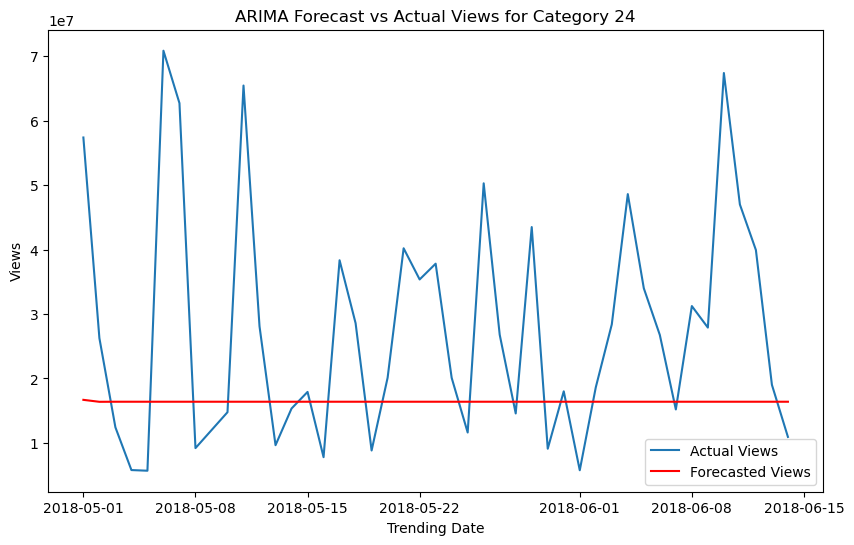

In [112]:
import matplotlib.pyplot as plt

# Forecast the future values
forecast_24 = results_24.forecast(steps=len(test_24))

# Plotting the actual test values
plt.figure(figsize=(10,6))
plt.plot(test_24['trending_date'], test_24['views'], label='Actual Views')

# Plotting the forecasted values
plt.plot(test_24['trending_date'], forecast_24, label='Forecasted Views', color='red')

# Adding labels and title
plt.xlabel('Trending Date')
plt.ylabel('Views')
plt.title('ARIMA Forecast vs Actual Views for Category 24')
plt.legend()

# Display the plot
plt.show()


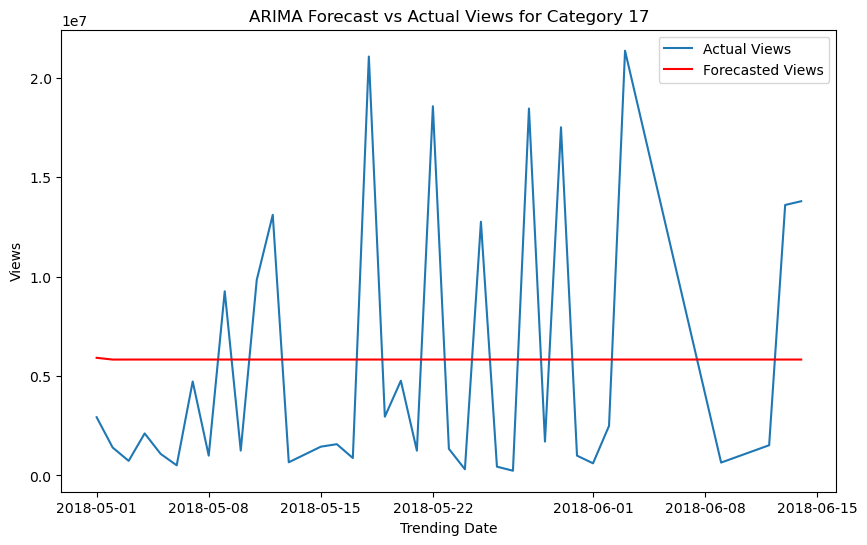

In [113]:
import matplotlib.pyplot as plt

# Forecast the future values
forecast_17 = results_17.forecast(steps=len(test_17))

# Plotting the actual test values
plt.figure(figsize=(10,6))
plt.plot(test_17['trending_date'], test_17['views'], label='Actual Views')

# Plotting the forecasted values
plt.plot(test_17['trending_date'], forecast_17, label='Forecasted Views', color='red')

# Adding labels and title
plt.xlabel('Trending Date')
plt.ylabel('Views')
plt.title('ARIMA Forecast vs Actual Views for Category 17')
plt.legend()

# Display the plot
plt.show()


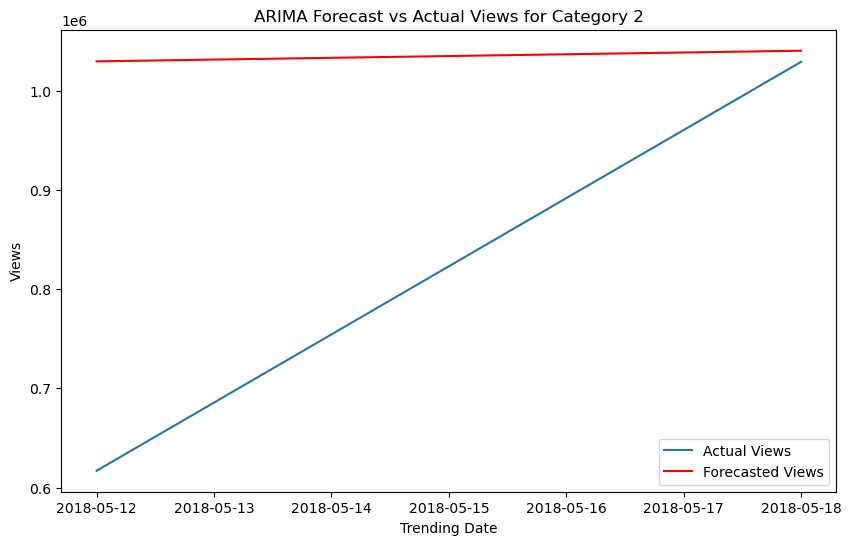

In [114]:
import matplotlib.pyplot as plt

# Forecast the future values
forecast_2 = results_2.forecast(steps=len(test_2))

# Plotting the actual test values
plt.figure(figsize=(10,6))
plt.plot(test_2['trending_date'], test_2['views'], label='Actual Views')

# Plotting the forecasted values
plt.plot(test_2['trending_date'], forecast_2, label='Forecasted Views', color='red')

# Adding labels and title
plt.xlabel('Trending Date')
plt.ylabel('Views')
plt.title('ARIMA Forecast vs Actual Views for Category 2')
plt.legend()

# Display the plot
plt.show()


#From above, we should choose category 17 based on RMSE we calculated. And let's regard this as our base model, then try another model

In [107]:
# len(pred3_df_whole.title.unique())
# pred3_df_whole

In [111]:
#LSTM

In [112]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [113]:
#set up train and test data
test_model_24 = pred_t1.loc[pred_t1.category_id == '24'][['views', 'trending_date']].set_index('trending_date')
ts_data_24 = test_model_24.groupby(test_model_24.index).sum()

test_model_17 = pred_t1.loc[pred_t1.category_id == '17'][['views', 'trending_date']].set_index('trending_date')
ts_data_17 = test_model_17.groupby(test_model_17.index).sum()

test_model_2 = pred_t1.loc[pred_t1.category_id == '2'][['views', 'trending_date']].set_index('trending_date')
ts_data_2 = test_model_2.groupby(test_model_2.index).sum()

#Then we split the data into test and training groups.

model_24 = ts_data_24.reset_index()
train_24= model_24.loc[(model_24.trending_date >= datetime.strptime('2017-11-01',"%Y-%m-%d")) & (model_24.trending_date <= datetime.strptime('2018-04-30',"%Y-%m-%d"))]
test_24 = model_24.loc[(model_24.trending_date >= datetime.strptime('2018-05-01',"%Y-%m-%d")) & (model_24.trending_date <= datetime.strptime('2018-06-30',"%Y-%m-%d"))]

model_17 = ts_data_17.reset_index()
train_17= model_17.loc[(model_17.trending_date >= datetime.strptime('2017-11-01',"%Y-%m-%d")) & (model_17.trending_date <= datetime.strptime('2018-04-30',"%Y-%m-%d"))]
test_17 = model_17.loc[(model_17.trending_date >= datetime.strptime('2018-05-01',"%Y-%m-%d")) & (model_17.trending_date <= datetime.strptime('2018-06-30',"%Y-%m-%d"))]

model_2 = ts_data_2.reset_index()
train_2= model_2.loc[(model_2.trending_date >= datetime.strptime('2017-11-01',"%Y-%m-%d")) & (model_2.trending_date <= datetime.strptime('2018-04-30',"%Y-%m-%d"))]
test_2 = model_2.loc[(model_2.trending_date >= datetime.strptime('2018-05-01',"%Y-%m-%d")) & (model_2.trending_date <= datetime.strptime('2018-06-30',"%Y-%m-%d"))]

#Apply LSTM

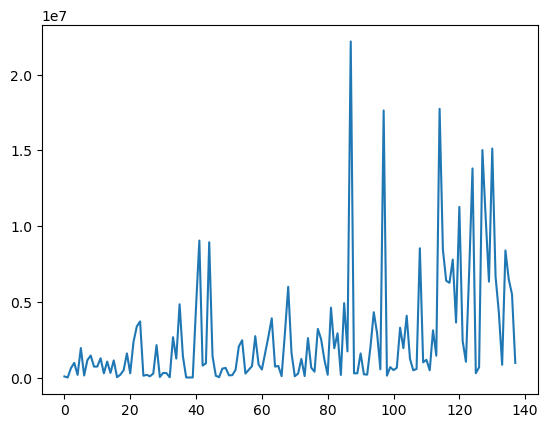

138 37
Epoch 1/100
136/136 - 2s - loss: 0.0367 - 2s/epoch - 14ms/step
Epoch 2/100
136/136 - 0s - loss: 0.0316 - 163ms/epoch - 1ms/step
Epoch 3/100
136/136 - 0s - loss: 0.0310 - 158ms/epoch - 1ms/step
Epoch 4/100
136/136 - 0s - loss: 0.0311 - 157ms/epoch - 1ms/step
Epoch 5/100
136/136 - 0s - loss: 0.0310 - 156ms/epoch - 1ms/step
Epoch 6/100
136/136 - 0s - loss: 0.0310 - 159ms/epoch - 1ms/step
Epoch 7/100
136/136 - 0s - loss: 0.0310 - 159ms/epoch - 1ms/step
Epoch 8/100
136/136 - 0s - loss: 0.0310 - 157ms/epoch - 1ms/step
Epoch 9/100
136/136 - 0s - loss: 0.0309 - 158ms/epoch - 1ms/step
Epoch 10/100
136/136 - 0s - loss: 0.0309 - 157ms/epoch - 1ms/step
Epoch 11/100
136/136 - 0s - loss: 0.0309 - 159ms/epoch - 1ms/step
Epoch 12/100
136/136 - 0s - loss: 0.0308 - 159ms/epoch - 1ms/step
Epoch 13/100
136/136 - 0s - loss: 0.0309 - 159ms/epoch - 1ms/step
Epoch 14/100
136/136 - 0s - loss: 0.0309 - 158ms/epoch - 1ms/step
Epoch 15/100
136/136 - 0s - loss: 0.0309 - 161ms/epoch - 1ms/step
Epoch 16/100
1

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

tf.random.set_seed(9)
plt.plot(train_17['views'])
plt.show()

dataset = train_17['views'].values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

train = dataset

dataset1 = test_17['views'].values
dataset1 = dataset1.astype('float32')
# normalize the dataset
scaler1 = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler1.fit_transform(dataset1.reshape(-1, 1))

test = dataset1

print(len(train),len(test))


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler1.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

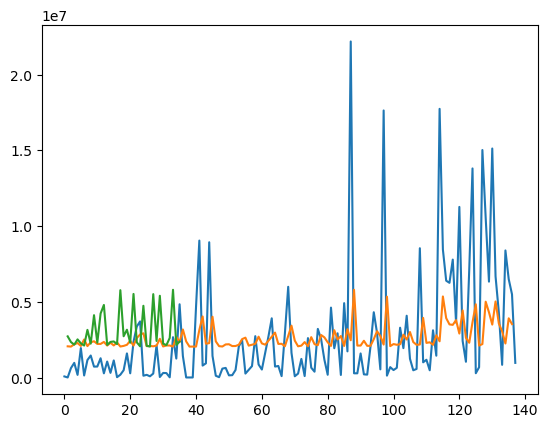

In [115]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset1)
testPredictPlot[:, :] = np.nan
testPredictPlot[look_back:len(testPredict)+look_back, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [116]:
#From the plot above, we see how LSTM model predict views where green line is the test data, 
#orange is the train data, and blue line is the original data
#Trend appears to fit, while the absolute values are not so well predicted

In [117]:
#Above all, we select category 17 as our target category, next we want to select the days and time
#to stream our data

In [195]:
pred_t2 = pred_t[pred_t["category_id"] == '17']
pred_t2

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,video_error_or_removed,description,id,category,publishing_day,hour,min,sec,date_diff,Days_to_Trend
23877,NfLVVJOuY5M,2017-11-15,Stunning MTB masterclass: Matt Jones | Frames ...,Red Bull,2017-11-14,17,16:00:04,red bull redbull action sports extreme sports ...,71661,6310,...,False,Check out Matt's channel right here: https://w...,17,Sports,Tuesday,16,00,04,1 days,1.0
23893,k-w8GxCpsCU,2017-11-16,John Collins' Best Dunks So Far This Season,Atlanta Hawks,2017-11-09,17,02:36:09,Atlanta Hawks ATL Hawks Hawks basketball NBA A...,2394,19,...,False,Hawks' rookie John Collins has been taking fli...,17,Sports,Thursday,02,36,09,7 days,7.0
23908,UwdLlnPaRAU,2017-11-17,Tony Hawk Answers Skateboarding Questions From...,WIRED,2017-11-15,17,17:00:36,kickflip ollie skate skateboarding tech suppor...,420033,14353,...,False,Tony Hawk uses the power of Twitter to answer ...,17,Sports,Wednesday,17,00,36,2 days,2.0
23913,9WT7NU3Rwr0,2017-11-17,Ben Simmons | Highlights vs Lakers (10.15.17) ...,Philadelphia 76ers,2017-11-16,17,06:26:28,Philadelphia 76ers Sixers NBA Ben Simmons Los ...,12831,86,...,False,Highlights of Ben Simmons against the Los Ange...,17,Sports,Thursday,06,26,28,1 days,1.0
23915,yxFdue1dCtE,2017-11-17,NBA Daily Show: Nov. 14 - The Starters,NBA,2017-11-15,17,01:10:19,nba basketball starters,137518,1990,...,False,"On Tuesday's episode of The Starters, the guys...",17,Sports,Wednesday,01,10,19,2 days,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,Ji_4dH_FXzw,2018-06-09,2018 Preakness Stakes I FULL RACE I NBC Sports,NBC Sports,2018-05-19,17,23:10:34,Horse racing horses full race Justify 2018 Pre...,649426,2296,...,False,Watch to find out the winner of the 2018 Preak...,17,Sports,Saturday,23,10,34,21 days,21.0
26022,3tYpfAPVEs0,2018-06-12,Stephen A. and Max react to LeBron James' brok...,ESPN,2018-06-11,17,14:43:53,espn espn live lebron broken hand lebron james...,746980,6918,...,False,First Take's Stephen A. Smith and Max Kellerma...,17,Sports,Monday,14,43,53,1 days,1.0
26025,tsM6kq-7nmw,2018-06-12,Does LeBron need a 4th title to pass Jordan as...,Skip and Shannon: UNDISPUTED,2018-05-30,17,17:01:39,fox fox sports fs1 fox sports 1 undisputed ski...,774151,6359,...,False,"Rob Parker joins Skip Bayless, Shannon Sharpe ...",17,Sports,Wednesday,17,01,39,13 days,13.0
26030,v-dfygYIfLs,2018-06-13,Old School Trick Shots | Dude Perfect,Dude Perfect,2018-06-04,17,21:55:13,dude perfect dude perfect stereotypes dude per...,13594421,439357,...,False,It’s time to look old! Special thanks to the U...,17,Sports,Monday,21,55,13,9 days,9.0


In [196]:
# Data Preparation
pred_t2['hour'] = pd.to_numeric(pred_t2['hour'])
pred_t2['Days_to_Trend'] = pd.to_numeric(pred_t2['Days_to_Trend'], errors='coerce')
pred_t2['publishing_day'] = pred_t2['publishing_day'].astype(str)

# Check for missing values in the relevant columns
missing_values = pred_t2[['publishing_day', 'hour', 'Days_to_Trend']].isnull().sum()

pred_t2 = pred_t2[['Days_to_Trend', 'publishing_day']]
pred_t2
grouped_data = pred_t2.groupby(['publishing_day']).mean()
grouped_data
#we choose Thursday based on summary data

/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/3545817980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_t2['hour'] = pd.to_numeric(pred_t2['hour'])
/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/3545817980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_t2['Days_to_Trend'] = pd.to_numeric(pred_t2['Days_to_Trend'], errors='coerce')
/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/3545817980.py:4: SettingWithCopyWarning: 
A value is trying t

,Days_to_Trend
publishing_day,
Friday,7.190476
Monday,5.342466
Saturday,58.294118
Sunday,10.948718
Thursday,4.973684
Tuesday,124.108108
Wednesday,5.936508


In [205]:
pred_t3 = pred_t[pred_t["category_id"] == '17']

# Data Preparation
pred_t3['hour'] = pd.to_numeric(pred_t3['hour'])
pred_t3['Days_to_Trend'] = pd.to_numeric(pred_t3['Days_to_Trend'], errors='coerce')
pred_t3['publishing_day'] = pred_t3['publishing_day'].astype(str)

# Check for missing values in the relevant columns
missing_values = pred_t3[['publishing_day', 'hour', 'Days_to_Trend']].isnull().sum()

pred_t3 = pred_t3[pred_t3['publishing_day'] == 'Thursday']
pred_t3 = pred_t3[['Days_to_Trend', 'hour']]
pred_t3

grouped_data2 = pred_t3.groupby(['hour']).mean()
grouped_data2
#we choose 4am and 4pm based on summary data

/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/3551845812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_t3['hour'] = pd.to_numeric(pred_t3['hour'])
/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/3551845812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_t3['Days_to_Trend'] = pd.to_numeric(pred_t3['Days_to_Trend'], errors='coerce')
/var/folders/ff/l9n_bjp95wq8h887c_y2fr2c0000gn/T/ipykernel_5530/3551845812.py:6: SettingWithCopyWarning: 
A value is trying t

,Days_to_Trend
hour,
1,3.666667
2,8.000000
4,1.000000
5,3.000000
6,3.250000
7,9.600000
9,5.750000
13,5.500000
15,2.000000


In [212]:
# #plot number of videos published corresponding to different day
# plt.subplot()
# g = sns.countplot( x = 'publishing_day', data=pred_t2, order = sorted(pred_t2['publishing_day'].unique()))
# g.set_xticklabels(g.get_xticklabels(),rotation=90)
# g.set_title("Day Counting")
# g.set_xlabel("Day")
# g.set_ylabel("Count")
# plt.show()
# #we noticed that on Friday, Thursday, Tuesday and Wednesday, the number of trending videos are relatively larger than the other days

In [213]:
#plot in number of videos published corresponding to hours
# plt.subplot()
# g = sns.countplot( x = 'hour', data=pred_t3, order = sorted(pred_t3['hour'].unique()))
# g.set_xticklabels(g.get_xticklabels(),rotation=90)
# g.set_title("Hour Counting")
# g.set_xlabel("Hours")
# g.set_ylabel("Count")
# plt.show()
#from the plot, we noticed that there are more trending videos published within time interval between 3pm to 6pm

In [122]:
#Now we want to do some analysis on descriptive columns

In [214]:
#obtain data frame for word analysis
df = pred_t
df

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,video_error_or_removed,description,id,category,publishing_day,hour,min,sec,date_diff,Days_to_Trend
3218,ogYum4kWXgk,2017-11-14,People are Awesome & The Pet Collective presen...,People are Awesome,2017-11-13,24,13:00:06,people are awesome people are awesome 2017 you...,69844,3417,...,False,Pets are Awesome! This is for all the animal l...,24,Entertainment,Monday,13,00,06,1 days,1.0
3220,0PpNlNJ6Nng,2017-11-14,Will It Watermarble?! Sister Edition | Waterma...,Simply Nailogical,2017-11-11,24,19:03:43,nails nail art nail tutorial beauty tutorial n...,1842393,99086,...,False,Guess who's back... back again... Jenny's back...,24,Entertainment,Saturday,19,03,43,3 days,3.0
3222,9xSx-5tmq44,2017-11-14,Daddy's Home 2 - Movie Review,Jeremy Jahns,2017-11-11,24,06:34:48,daddy's home daddy's home 2 mel gibson john li...,291597,8209,...,False,Meet The Fockers meets...well...Daddy's Home. ...,24,Entertainment,Saturday,06,34,48,3 days,3.0
3224,6340tX9M_eM,2017-11-14,Batman: Gotham by Gaslight - Exclusive Trailer...,IGN,2017-11-10,24,19:00:00,IGN Batman Trailer Elseworlds DC Comics DC Uni...,537715,8231,...,False,The Dark Knight's Elseworlds tale gets the ani...,24,Entertainment,Friday,19,00,00,4 days,4.0
3227,abGCYPCk294,2017-11-14,"Justice League Reactions, Should Disney Buy Ne...",John Campea,2017-11-11,24,17:55:27,Justice LEague Movie Reactions Reviews Film Di...,43715,1550,...,False,On this episode of The John Campea Show (Recor...,24,Entertainment,Saturday,17,55,27,3 days,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39592,r2H8Oqm1eQ4,2018-04-15,Why Expensive Cars Aren't Always Reliable,Engineering Explained,2018-04-08,2,14:00:07,expensive car new car used car buy car reliabl...,455281,9826,...,False,Why Luxury Cars Don't Need To Be Reliable\nIt'...,2,Autos & Vehicles,Sunday,14,00,07,7 days,7.0
39599,r2H8Oqm1eQ4,2018-04-18,Why Expensive Cars Aren't Always Reliable,Engineering Explained,2018-04-08,2,14:00:07,expensive car new car used car buy car reliabl...,471281,10153,...,False,Why Luxury Cars Don't Need To Be Reliable\nIt'...,2,Autos & Vehicles,Sunday,14,00,07,10 days,10.0
39604,r2H8Oqm1eQ4,2018-04-23,Why Expensive Cars Aren't Always Reliable,Engineering Explained,2018-04-08,2,14:00:07,expensive car new car used car buy car reliabl...,491988,10576,...,False,Why Luxury Cars Don't Need To Be Reliable\nIt'...,2,Autos & Vehicles,Sunday,14,00,07,15 days,15.0
39607,azUbCdcAeFM,2018-05-12,Tesla 2018,Tesla,2018-05-10,2,01:03:00,tesla model s model x model 3 powerwall electr...,617010,28361,...,False,https://www.tesla.com/,2,Autos & Vehicles,Thursday,01,03,00,2 days,2.0


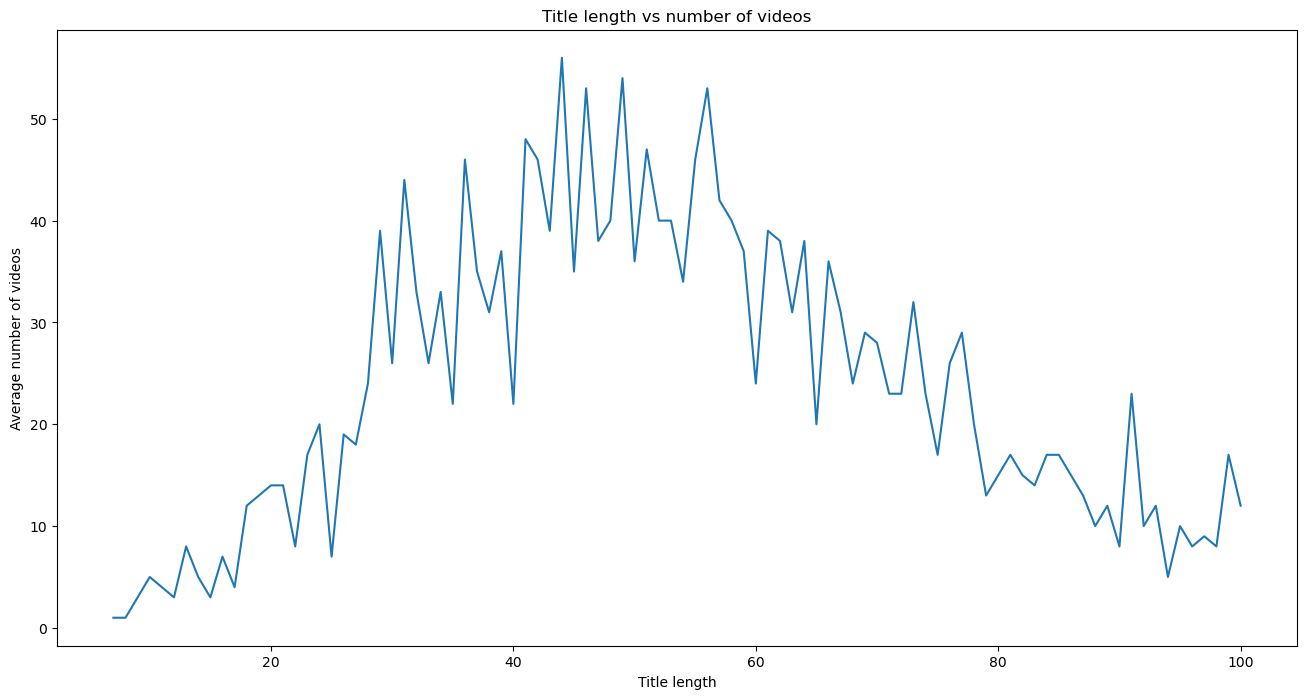

In [215]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig = df['title_length'].value_counts().sort_index().plot.line(figsize=(16,8))

plt.title('Title length vs number of videos', fontsize = 12)
plt.xlabel('Title length')
plt.ylabel('Average number of videos')
plt.show()
#From the plot, we see how title length relates to average number of videos

In [216]:
df["title_length"].describe()

count    2232.000000
mean       53.794803
std        19.906415
min         7.000000
25%        39.000000
50%        52.000000
75%        67.000000
max       100.000000
Name: title_length, dtype: float64

In [217]:
pip install gensim pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.7 MB/s eta 0:00:00
  Obtaining dependency information for simpful from https://files.pythonhosted.org/packages/8d/93/8448d3f1aa9d2911b8cba2602aaa1af85eb31a26d28b7b737f1fa5b40c02/simpful-2.11.1-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20430 sha256=f938a7bf4a47e4a6b69611f59237360461114427ead60c43295520b9f1bac7b0
  Stored in directory: /Users/jennyzhu/Library/Caches/pip/wheels/69/f5/e5/18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3513 sha256=7fda55918a333fc3a98c42f69072a2249546437ed9db5b9346943e3f755ba9c7
  Stored in directory: /Users/jennyzhu/Library/Caches/pip/wheels/9d/ff/2f/afe4cd56f47de147407705626517d68bea0f3b74eb1fb168e6
Successfully built fst-pso miniful
Note: you may need to restart the kernel to use up

In [224]:
#Use word2vec transforming columns to vector
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short
from gensim.models import Word2Vec

# Preprocessing function
def preprocess(text):
    # List of preprocessing functions to apply
    filters = [strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short]
    return preprocess_string(text, filters)

# Apply preprocessing to the specified columns
columns_to_preprocess = ['title', 'channel_title', 'tags', 'description']
for column in columns_to_preprocess:
    # Check if column exists in the data
    if column in df.columns:
        df[column] = df[column].astype(str).apply(preprocess)
    else:
        print(f"Column '{column}' not found in the data.")

# Display the first few rows of the preprocessed data
df[columns_to_preprocess].head()


,title,channel_title,tags,description
3218,"[People, Awesome, The, Pet, Collective, presen...","[People, Awesome]","[people, awesome, people, awesome, youtube, co...","[Pets, Awesome, This, animal, lovers, Pets, ar..."
3220,"[Will, Watermarble, Sister, Edition, Watermarb...","[Simply, Nailogical]","[nails, nail, art, nail, tutorial, beauty, tut...","[Guess, Jenny, tell, friend, nThis, family, fr..."
3222,"[Daddy, Home, Movie, Review]","[Jeremy, Jahns]","[daddy, home, daddy, home, mel, gibson, john, ...","[Meet, The, Fockers, meets, Daddy, Home, Here,..."
3224,"[Batman, Gotham, Gaslight, Exclusive, Trailer]",[IGN],"[IGN, Batman, Trailer, Elseworlds, Comics, Uni...","[The, Dark, Knight, Elseworlds, tale, gets, an..."
3227,"[Justice, League, Reactions, Should, Disney, B...","[John, Campea]","[Justice, LEague, Movie, Reactions, Reviews, F...","[episode, The, John, Campea, Show, Recorded, S..."


In [233]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Function to combine TF-IDF vectors from multiple columns
def combine_tfidf_vectors(df, columns):
    vectorizer = TfidfVectorizer(max_features=500)  # Limiting to 500 features for efficiency
    combined_vectors = None

    for column in columns:
        # Generate TF-IDF vectors for the column
        tfidf_matrix = vectorizer.fit_transform(df[column].astype(str))

        # Reduce dimensionality and normalize (L2 norm) the vectors
        svd = TruncatedSVD(100)  # Using 100 components
        normalizer = Normalizer(copy=False)
        lsa = make_pipeline(svd, normalizer)
        reduced_tfidf_matrix = lsa.fit_transform(tfidf_matrix)

        # Combine the vectors
        if combined_vectors is None:
            combined_vectors = reduced_tfidf_matrix
        else:
            combined_vectors = np.hstack((combined_vectors, reduced_tfidf_matrix))

    return combined_vectors

# Columns to be analyzed
columns_to_analyze = ['title', 'channel_title', 'tags', 'description']

# Check if the specified columns exist in the dataset
missing_columns = [column for column in columns_to_analyze if column not in df.columns]
if missing_columns:
    print(f"The following columns are missing from the dataset and will be ignored: {missing_columns}")
    columns_to_analyze = [column for column in columns_to_analyze if column in df.columns]

# Generate combined TF-IDF vectors
combined_tfidf_vectors = combine_tfidf_vectors(df, columns_to_analyze)
combined_tfidf_vectors.shape
combined_tfidf_vectors


array([[ 4.12481297e-01,  7.14876312e-01, -1.83898334e-01, ...,
         9.49338208e-03,  4.04759227e-02, -3.40306379e-04],
       [ 8.49960428e-03,  1.99482495e-02,  5.47448999e-02, ...,
        -1.01210143e-01, -8.83377822e-02,  4.78313258e-02],
       [ 5.95344676e-02,  7.96590239e-02,  7.13534812e-02, ...,
         1.87355376e-02, -3.50719411e-02,  8.21099968e-02],
       ...,
       [ 1.52950728e-02,  2.31230593e-02,  1.14942630e-02, ...,
        -6.88480884e-02,  5.65094445e-02, -2.52417201e-02],
       [ 2.30063499e-03,  8.81533830e-03,  6.10635836e-02, ...,
        -2.91255877e-02, -3.20823534e-02,  2.83635669e-03],
       [ 2.30063499e-03,  8.81533830e-03,  6.10635836e-02, ...,
        -2.91255877e-02, -3.20823534e-02,  2.83635669e-03]])

/Users/jennyzhu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jennyzhu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jennyzhu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jennyzhu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

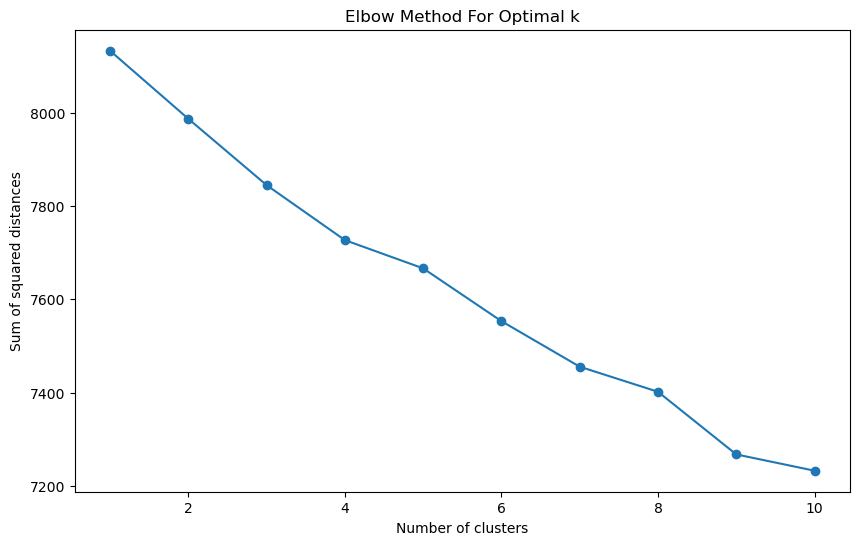

In [236]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to apply the Elbow Method to find the optimal number of clusters
def elbow_method(df, k_range):
    sum_of_squared_distances = []
    for k in k_range:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        sum_of_squared_distances.append(km.inertia_)
    return sum_of_squared_distances

# Applying the Elbow Method
k_range = range(1, 11)  # Trying with 1 to 10 clusters
sse = elbow_method(combined_tfidf_vectors, k_range)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()



In [240]:
#try cluster of 5
# Apply K-means clustering to the title vectors
kmeans_title = KMeans(n_clusters=5, random_state=0)
kmeans_title.fit(combined_tfidf_vectors)

# Getting the cluster labels for each title
title_cluster_labels = kmeans_title.labels_

# Adding the cluster labels to the dataset for the 'title' column
title_clustered_data = df.copy()
title_clustered_data['Title_Cluster'] = title_cluster_labels

# Displaying the first few rows of the dataset with title cluster labels
title_clustered_data[['title', 'Title_Cluster']]

/Users/jennyzhu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,title,Title_Cluster
3218,"[People, Awesome, The, Pet, Collective, presen...",4
3220,"[Will, Watermarble, Sister, Edition, Watermarb...",2
3222,"[Daddy, Home, Movie, Review]",3
3224,"[Batman, Gotham, Gaslight, Exclusive, Trailer]",4
3227,"[Justice, League, Reactions, Should, Disney, B...",4
...,...,...
39592,"[Why, Expensive, Cars, Aren, Always, Reliable]",3
39599,"[Why, Expensive, Cars, Aren, Always, Reliable]",3
39604,"[Why, Expensive, Cars, Aren, Always, Reliable]",3
39607,[Tesla],3
